In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from matplotlib import pyplot as plt
import wandb
from wandb.keras import WandbCallback

%matplotlib inline

Voy a probar usar wandb

In [10]:
lr = 1e-3
lbd = 1e-3
ep = 20

conf_dict = {"lr":lr,
             "lbd":lbd,
             "epochs":ep,
}

wandb.init(project='Wandb testing', config=conf_dict, 
           name=f'lr={lr}, lambda={lbd}, epochs={ep}')

epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▂▁▁▁▁▁▁
mse,█▆▄▁▁▁▁▁▁▁
val_loss,█▇▃▁▁▁▁▁▁▁
val_mse,█▇▂▁▁▁▁▁▁▁
GFLOPs,0.0
best_epoch,9
best_val_loss,0.00417
epoch,9
loss,0.00438
mse,0.00042


In [11]:
index = 85000
data = np.random.rand((100000))

Xtrain = data[:index]
ytrain = 4*Xtrain*(1-Xtrain)

Xtest = data[index:]
ytest = 4*Xtest*(1-Xtest)

print(Xtest.shape)

(15000,)


In [12]:
keras.backend.clear_session()

opt = keras.optimizers.Adam(learning_rate=lr)
reg = keras.regularizers.L2(lbd)

input = keras.layers.Input(shape=(1,))

l1 = keras.layers.Dense(5, activation='tanh', use_bias=True,
                        kernel_regularizer=reg)(input)

l2 = keras.layers.concatenate([l1, input])

output = keras.layers.Dense(1, activation='linear', use_bias=True)(l2)

model = keras.Model(inputs=input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 5)            10          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 6)            0           ['dense[0][0]',                  
                                                                  'input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1)            7           ['concatenate[0][0]']        

In [13]:
model.compile(optimizer=opt, loss='mse', 
              metrics=['mse'])

hist = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=ep, 
                  batch_size=50, callbacks=[WandbCallback()], verbose=2)

Epoch 1/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0964 - mse: 0.0941 - val_loss: 0.0776 - val_mse: 0.0741 - 6s/epoch - 4ms/step
Epoch 2/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0581 - mse: 0.0507 - val_loss: 0.0331 - val_mse: 0.0204 - 6s/epoch - 4ms/step
Epoch 3/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 5s - loss: 0.0219 - mse: 0.0074 - val_loss: 0.0166 - val_mse: 0.0028 - 5s/epoch - 3ms/step
Epoch 4/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.3s


1700/1700 - 5s - loss: 0.0139 - mse: 0.0020 - val_loss: 0.0117 - val_mse: 0.0014 - 5s/epoch - 3ms/step
Epoch 5/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.2s


1700/1700 - 6s - loss: 0.0103 - mse: 0.0011 - val_loss: 0.0091 - val_mse: 9.2207e-04 - 6s/epoch - 3ms/step
Epoch 6/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.2s


1700/1700 - 7s - loss: 0.0082 - mse: 8.0110e-04 - val_loss: 0.0075 - val_mse: 6.9193e-04 - 7s/epoch - 4ms/step
Epoch 7/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.6s


1700/1700 - 8s - loss: 0.0068 - mse: 6.1972e-04 - val_loss: 0.0063 - val_mse: 5.6168e-04 - 8s/epoch - 5ms/step
Epoch 8/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0058 - mse: 5.1732e-04 - val_loss: 0.0054 - val_mse: 4.8943e-04 - 6s/epoch - 4ms/step
Epoch 9/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0051 - mse: 4.4842e-04 - val_loss: 0.0047 - val_mse: 4.1079e-04 - 6s/epoch - 3ms/step
Epoch 10/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0045 - mse: 3.9638e-04 - val_loss: 0.0042 - val_mse: 3.7070e-04 - 6s/epoch - 4ms/step
Epoch 11/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.2s


1700/1700 - 6s - loss: 0.0040 - mse: 3.4622e-04 - val_loss: 0.0038 - val_mse: 3.6669e-04 - 6s/epoch - 4ms/step
Epoch 12/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0036 - mse: 3.0306e-04 - val_loss: 0.0035 - val_mse: 2.9487e-04 - 6s/epoch - 3ms/step
Epoch 13/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 7s - loss: 0.0034 - mse: 2.6698e-04 - val_loss: 0.0033 - val_mse: 2.7368e-04 - 7s/epoch - 4ms/step
Epoch 14/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0032 - mse: 2.4241e-04 - val_loss: 0.0031 - val_mse: 2.2471e-04 - 6s/epoch - 4ms/step
Epoch 15/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 7s - loss: 0.0030 - mse: 2.2248e-04 - val_loss: 0.0029 - val_mse: 2.0994e-04 - 7s/epoch - 4ms/step
Epoch 16/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0029 - mse: 2.0555e-04 - val_loss: 0.0028 - val_mse: 1.8946e-04 - 6s/epoch - 4ms/step
Epoch 17/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.2s


1700/1700 - 7s - loss: 0.0028 - mse: 1.9096e-04 - val_loss: 0.0027 - val_mse: 1.9275e-04 - 7s/epoch - 4ms/step
Epoch 18/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 6s - loss: 0.0027 - mse: 1.7943e-04 - val_loss: 0.0026 - val_mse: 1.7152e-04 - 6s/epoch - 4ms/step
Epoch 19/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.1s


1700/1700 - 7s - loss: 0.0026 - mse: 1.6912e-04 - val_loss: 0.0025 - val_mse: 1.5874e-04 - 7s/epoch - 4ms/step
Epoch 20/20
INFO:tensorflow:Assets written to: c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best\assets


wandb: Adding directory to artifact (c:\Users\Lautaro\Desktop\Lautaro\asd\2021\Doctorado\Materias\Deep Learning (2020)\Practicas\Mias\P4\wandb\run-20221001_155320-3i3pdmch\files\model-best)... Done. 0.2s


1700/1700 - 9s - loss: 0.0025 - mse: 1.5944e-04 - val_loss: 0.0025 - val_mse: 1.5562e-04 - 9s/epoch - 5ms/step


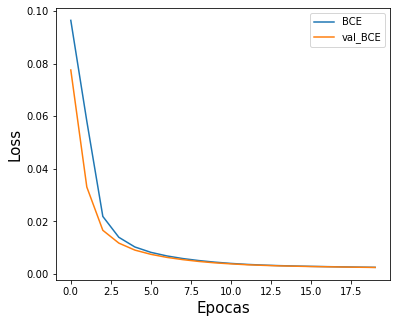

In [14]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,5))
ax1.plot(hist.history['loss'], label='BCE')
ax1.plot(hist.history['val_loss'], label='val_BCE')
ax1.set_xlabel('Epocas', fontsize=15)
ax1.set_ylabel('Loss', fontsize=15)
ax1.legend(loc='best')

In [16]:
type(model.predict([0.5], verbose=0)[0,0])

numpy.float32

In [41]:
seed = .2

x = []
xpred = []
x.append(seed)
xpred.append(seed)


for t in range(20):
    y = 4*x[t]*(1-x[t])
    x.append(y)
    y = model.predict([xpred[t]], verbose=0)[0,0].astype(float)
    xpred.append(y)


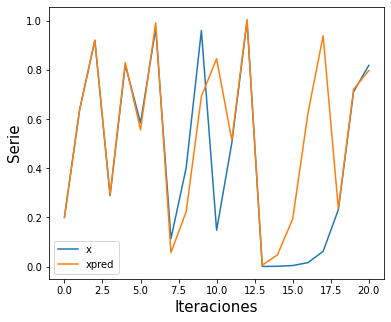

In [42]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(6,5))

ax1.plot(x, label='x')
ax1.plot(xpred, label='xpred')
ax1.set_xlabel('Iteraciones', fontsize=15)
ax1.set_ylabel('Serie', fontsize=15)
ax1.legend(loc='best')